In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [17]:
np.random.seed(0)
n= 100
pos = np.random.randn(n, 2) + [2, 2] 
neg = np.random.randn(n, 2) + [-2, -2]

In [20]:
pos[:3,:]

array([[3.76405235, 2.40015721],
       [2.97873798, 4.2408932 ],
       [3.86755799, 1.02272212]])

In [52]:
cls_0=pd.DataFrame(pos,columns=['x1','x2'])
cls_1=pd.DataFrame(neg,columns=['x1','x2'])
cls_0['y']=0
cls_1['y']=1
data=pd.concat([cls_0,cls_1],axis=0)

In [53]:
data=data.sample(frac=1)
X_train,X_test,y_train,y_test=train_test_split(data[['x1','x2']],data['y'],test_size=0.2, stratify=data['y'],random_state=42)

C:\Users\pmsda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pmsda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


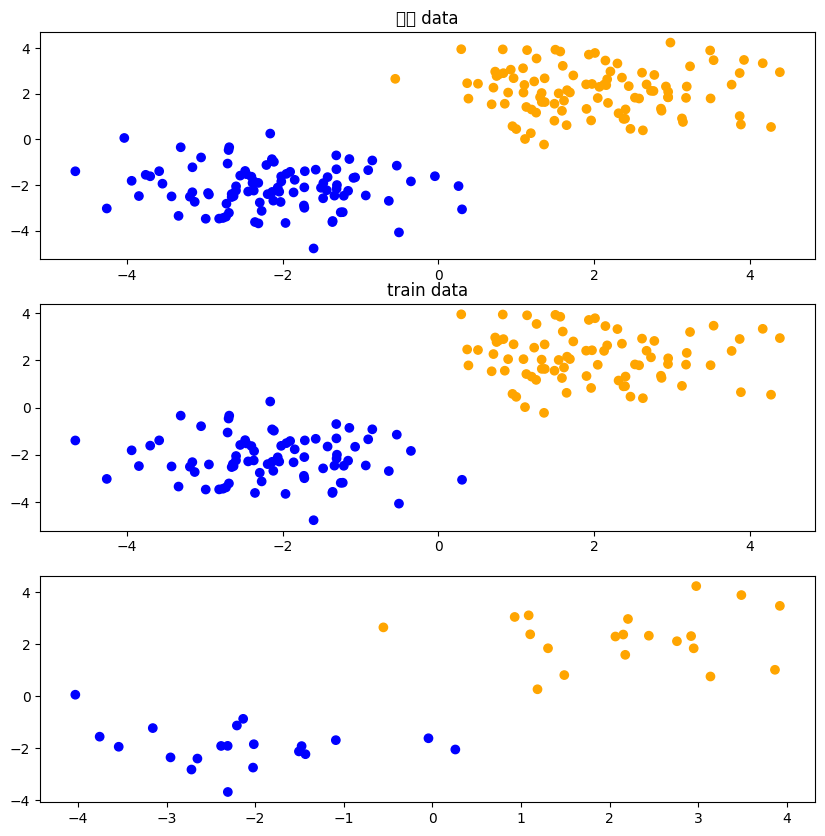

In [61]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['orange', 'blue'])

fig,ax=plt.subplots(3,1,figsize=(10,10))
ax[0].scatter(data['x1'],data['x2'],c=data['y'],cmap=cmap)
ax[0].set_title('전체 data')

ax[1].scatter(X_train['x1'],X_train['x2'],c=y_train,cmap=cmap)
ax[1].set_title('train data')

ax[2].scatter(X_test['x1'],X_test['x2'],c=y_test,cmap=cmap)
plt.show()

In [62]:
svc=LinearSVC(C=100)
svc.fit(X_train,y_train)

C:\Users\pmsda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(C=100)

In [68]:
w0,w1=svc.coef_[0]
b=svc.intercept_[0]

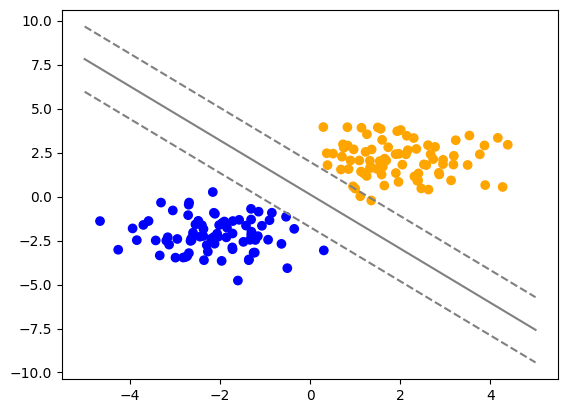

In [69]:
x=np.linspace(-5,5,num=100)
line=(b-w0*x)/w1
margin_plus=line+1/w1
margin_minus=line-1/w1

plt.scatter(X_train['x1'],X_train['x2'],c=y_train,cmap=cmap)
plt.plot(x,line,color='grey')
plt.plot(x,margin_minus,color='grey',linestyle='--')
plt.plot(x,margin_plus,color='grey',linestyle='--')
plt.show()